### Rushabh Barbhaya
### LAB1

In [1]:
# Import block
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from IPython.display import SVG 
from graphviz import Source 
from IPython.display import display
import matplotlib.pyplot as plt

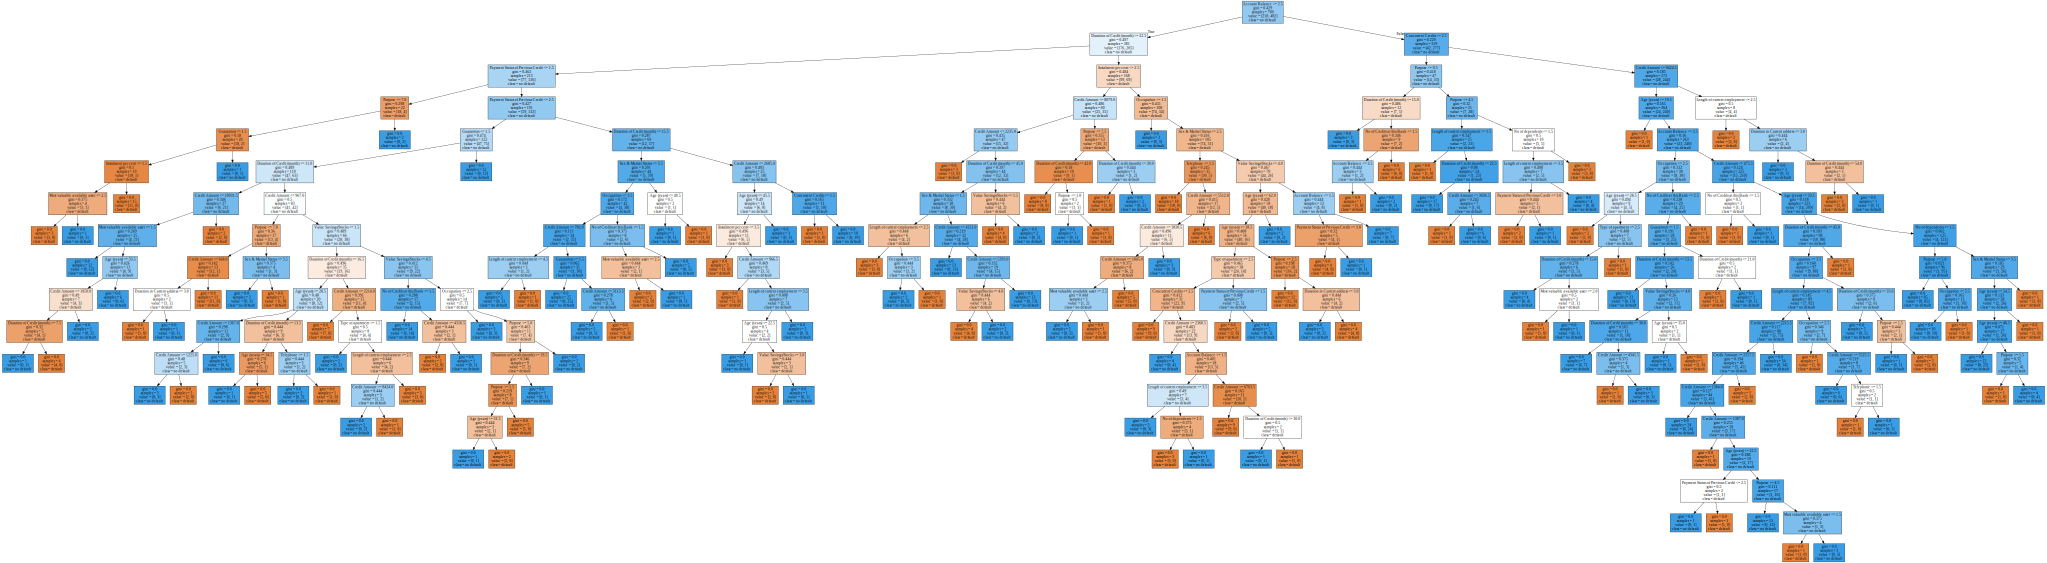

In [2]:
"""
Read the dataset and describe it's values
"""
credit = pd.read_csv("credit.csv")
# credit.describe()

"""
declare x and y variables
"""
credit_y = credit["Creditability"]
credit_x = credit.drop(["Creditability"], axis=1)

"""
Train-Test split using scikit-learn
"""
x_train, x_test, y_train, y_test = train_test_split(credit_x, credit_y, test_size=0.3, random_state=23458)

"""
Tree Model 1
"""
treeModel = tree.DecisionTreeClassifier()
creditModel1 = treeModel.fit(x_train, y_train)

"""
Visualize the model
"""
graph = Source(tree.export_graphviz(creditModel1, 
                                    out_file=None, 
                                    feature_names=credit_x.columns, 
                                    class_names=['default', 'no default'], 
                                    filled = True)) 
display(SVG(graph.pipe(format='svg')))

In [3]:
"""
Evaluating the model
"""
y_predict = creditModel1.predict(x_test) 
print(confusion_matrix(y_test, y_predict))
print("Accuracy= {:.4f}".format(accuracy_score(y_test, y_predict)*100))

[[ 44  38]
 [ 46 172]]
Accuracy= 72.0000


Question: If you see the accuracy 0f 100%, what does it mean? Does this mean that we design a perfect model? This is some thing that needs more discussion. Write a few sentences about accuracy of 100%.

Answer: Accuracy of a 100% would could mean a couple of things. It could mean that we have a perfect model (highly unlikely) or we have overfitted the model. Overfitting the model is not desirable, when a model is overfitted, it starts remembering all the values and therefore gives 100% accuracy.

### Random Forest Model

In [4]:
treeModel2 = RandomForestClassifier() 
ForestModel2 = treeModel2.fit(x_train, y_train) 
y_predict = ForestModel2.predict(x_test) 
print(confusion_matrix(y_test, y_predict)) 
print("Accuracy= {:.4f}".format(accuracy_score(y_test, y_predict)*100))

[[ 39  43]
 [ 21 197]]
Accuracy= 78.6667


### Regression Forest

In [5]:
wine = pd.read_csv("whitewines.csv")
treeModel2 = tree.DecisionTreeClassifier()
wine_y = wine["quality"]
wine_x = wine.drop(["quality"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=60)
model3 = treeModel2.fit(x_train, y_train)

export_graphviz(model3, out_file ='tree.dot', feature_names=wine_x.columns)

dot_data = tree.export_graphviz(model3, 
                                out_file=None, 
                                feature_names=wine_x.columns, 
                                filled=True, 
                                rounded=True, 
                                special_characters=True) 
graph = Source(dot_data) 
graph

In [6]:
y_predict = model3.predict(x_test) 
#print(np.corrcoef(y_test,y_predict))
print("Accuracy= {:.4f}".format(accuracy_score(y_test,y_predict)*100))

'''
Most important features
'''
feature_importances=pd.DataFrame(treeModel2.feature_importances_,index = wine_x.columns.to_list(),
                                 columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances[:3])

Accuracy= 58.23129251700681
                     importance
alcohol                0.129063
volatile acidity       0.110951
free sulfur dioxide    0.102753


In [7]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=23458)
model4 = treeModel2.fit(x_train, y_train)
y_predict = model4.predict(x_test) 
#print(np.corrcoef(y_test,y_predict))
print("Accuracy={:.4f}".format(accuracy_score(y_test,y_predict)*100))

print()
print(r"Question 2: What are the three most important features in this model?")
print(r"Now, Change the random seed to 23458 and find the new accuracy of random forest.")
print("\nAnswer: The 3 important features are", feature_importances.index[:3].format())
print("New accuracy is {:.4f}".format(accuracy_score(y_test,y_predict)*100))

Accuracy=59.6599

Question 2: What are the three most important features in this model?
Now, Change the random seed to 23458 and find the new accuracy of random forest.

Answer: The 3 important features are ['alcohol', 'volatile acidity', 'free sulfur dioxide']
New accuracy is 59.6599


### Adding regression to trees

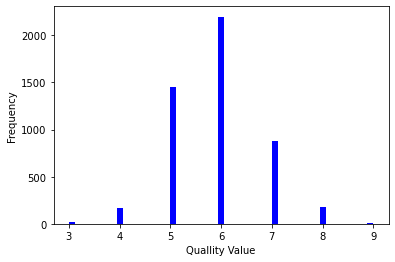

In [8]:
# Visualizing the wine quality with a historical 
n, bins, patches = plt.hist(x=wine['quality'], bins='auto', color='b', ) 
plt.xlabel('Quallity Value') 
plt.ylabel('Frequency') 
plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.25, random_state=72)
model5 = treeModel2.fit(x_train, y_train)
y_predict = model5.predict(x_test)
export_graphviz(model5, out_file ='tree.dot', feature_names =wine_x.columns)
dot_data = tree.export_graphviz(model5, out_file=None,
                                feature_names=wine_x.columns, 
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = Source(dot_data) 
graph

In [11]:
print(np.corrcoef(y_test,y_predict))
print("Accuracy={:.4f}".format(accuracy_score(y_test,y_predict)*100))
mse_dt = MSE(y_test, y_predict)
rmse_dt = mse_dt**(1/2)
print("RMSE Value={:.4f}".format(rmse_dt))

[[1.         0.55167712]
 [0.55167712 1.        ]]
Accuracy=60.8163
RMSE Value=0.8291


Question 3: What is your interpretation about this amount of RMSE?

Answer: 

### News Popularity

In [23]:
news = pd.read_csv(r"OnlineNewsPopularity_for_python.csv")
popular = news.shares >= 1400 
unpopular = news.shares < 1400 
news.loc[popular,'shares'] = 1 
news.loc[unpopular,'shares'] = 0
news = news.drop(["url"], axis=1)

news_y = news["shares"]
news_x = news.drop(["shares"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(news_x, news_y, test_size=0.2, random_state=75)

newsModel1 = treeModel.fit(x_train, y_train)
newsModel2 = treeModel2.fit(x_train, y_train)

y_predict = newsModel1.predict(x_test) 
print(confusion_matrix(y_test, y_predict))
print("Decision Tree Accuracy= {:.4f}".format(accuracy_score(y_test, y_predict)*100))

y_predict = newsModel2.predict(x_test) 
print(confusion_matrix(y_test, y_predict))
print("Forest Model Accuracy= {:.4f}".format(accuracy_score(y_test, y_predict)*100))

[[2013 1627]
 [1679 2610]]
Decision Tree Accuracy= 58.3050
[[2012 1628]
 [1675 2614]]
Forest Model Accuracy= 58.3428
